<a href="https://colab.research.google.com/github/Gopisarath/Basic-ML/blob/main/Pharmaceutical_Drug_Spending_by_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**EDA** **ON** **Pharmaceutical** **Drug** **Spending** **by** **countries** 

**Dataset**

**Introduction**

In this notebook, I have done the Exploratory Data Analysis of the student performance in exams dataset and tried to gain useful insights from the data. The features present in the dataset are:

Frequency

Time

Value

**Importing** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


**Preliminary** **Data** **Processing**

To start off, we read in our dataset and generate a simple preview and statistics of our data.

**Loading** **data**

In [3]:
df=pd.read_csv("Pharmaceutical Drug Spending by countries.csv")
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1971,15.992,NaN
1,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1972,15.091,NaN
2,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1973,15.117,NaN
3,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1974,14.771,NaN
4,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1975,11.849,NaN
...,...,...,...,...,...,...,...,...
3791,COL,PHARMAEXP,TOT,USD_CAP,A,2013,144.302,NaN
3792,COL,PHARMAEXP,TOT,USD_CAP,A,2014,154.548,NaN
3793,COL,PHARMAEXP,TOT,USD_CAP,A,2015,159.429,NaN
3794,COL,PHARMAEXP,TOT,USD_CAP,A,2016,171.109,NaN


The output shows that we have around 3796 entries with 8 columns in our dataset.

**Understanding** **the** **Data**

In [4]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1971,15.992,NaN
1,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1972,15.091,NaN
2,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1973,15.117,NaN
3,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1974,14.771,NaN
4,AUS,PHARMAEXP,TOT,PC_HEALTHXP,A,1975,11.849,NaN


The output shows the first 5 rows of our dataset.

In [5]:
df.tail()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
3791,COL,PHARMAEXP,TOT,USD_CAP,A,2013,144.302,NaN
3792,COL,PHARMAEXP,TOT,USD_CAP,A,2014,154.548,NaN
3793,COL,PHARMAEXP,TOT,USD_CAP,A,2015,159.429,NaN
3794,COL,PHARMAEXP,TOT,USD_CAP,A,2016,171.109,NaN
3795,COL,PHARMAEXP,TOT,USD_CAP,A,2017,177.532,NaN


The output shows the last 5 rows of our dataset.

In [6]:
df.shape

(3796, 8)

We observe from this above line that our dataset has 3796 rows and 8 columns.

In [7]:
df.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')


The output shows the names of the columns in our dataset

In [8]:
df.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME            int64
Value         float64
Flag Codes     object
dtype: object

2 of the columns are numeric while the other 6 are categorical which is seen by dtpes function.

In [9]:
df.describe(include="all")

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
count,3796,3796,3796,3796,3796,3796.000000,3796.00000,182
unique,43,1,1,3,1,NaN,NaN,3
top,KOR,PHARMAEXP,TOT,PC_GDP,A,NaN,NaN,B
freq,153,3796,3796,1281,3796,NaN,NaN,161
mean,NaN,NaN,NaN,NaN,NaN,1999.659378,112.14907,NaN
std,NaN,NaN,NaN,NaN,NaN,13.715292,193.25885,NaN
min,NaN,NaN,NaN,NaN,NaN,1970.000000,0.20700,NaN
25%,NaN,NaN,NaN,NaN,NaN,1989.000000,1.48000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2002.000000,14.97850,NaN
75%,NaN,NaN,NaN,NaN,NaN,2012.000000,125.71825,NaN


This method generates a high-level summary of the attributes over each column of the dataset. More probably, it provides the statistical insights of the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    3796 non-null   object 
 1   INDICATOR   3796 non-null   object 
 2   SUBJECT     3796 non-null   object 
 3   MEASURE     3796 non-null   object 
 4   FREQUENCY   3796 non-null   object 
 5   TIME        3796 non-null   int64  
 6   Value       3796 non-null   float64
 7   Flag Codes  182 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 237.4+ KB


Here is the more information of our dataset chosen. We can see that all the columns of our dataset are free from null values.

In [11]:
df.duplicated().sum()

0

From this output, it is clear that we don't have any duplicates in our dataset.

In [14]:
df["MEASURE"].value_counts()

PC_GDP         1281
USD_CAP        1258
PC_HEALTHXP    1257
Name: MEASURE, dtype: int64


Here, we observed that our dataset is not balanced to the mark as there are three different groups of which PC_GDP is the most occurring group

In [15]:

df.isnull().sum()

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    3614
dtype: int64

Here,we get the missing values in each column present in our dataset.

In [16]:
df.dropna(inplace=True)
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
48,AUT,PHARMAEXP,TOT,PC_HEALTHXP,A,1990,10.131,B
62,AUT,PHARMAEXP,TOT,PC_HEALTHXP,A,2004,13.308,B
106,BEL,PHARMAEXP,TOT,PC_HEALTHXP,A,2003,17.314,B
128,CAN,PHARMAEXP,TOT,PC_HEALTHXP,A,1975,9.319,B
172,CAN,PHARMAEXP,TOT,PC_HEALTHXP,A,2019,16.085,P


From this,we are getting the dataset by removing all the inconsistency present in it.

In [17]:

df.iloc[:10,:3]

,LOCATION,INDICATOR,SUBJECT
48,AUT,PHARMAEXP,TOT
62,AUT,PHARMAEXP,TOT
106,BEL,PHARMAEXP,TOT
128,CAN,PHARMAEXP,TOT
172,CAN,PHARMAEXP,TOT
183,CZE,PHARMAEXP,TOT
186,CZE,PHARMAEXP,TOT
196,CZE,PHARMAEXP,TOT
226,DNK,PHARMAEXP,TOT
233,DNK,PHARMAEXP,TOT


By using positional based indexing function iloc[:10,:3], we got the part of the dataset which is having 10 rows and 3 columns

In [20]:

df.loc[:,["TIME","Value"]]

,TIME,Value
48,1990,10.131
62,2004,13.308
106,2003,17.314
128,1975,9.319
172,2019,16.085
...,...,...
3755,2018,18.391
3764,2018,284.699
3766,2014,1.574
3771,2014,17.320



By using label based indexing function df.loc[:,["TIME","Value"]], we got the dataset consisting of TIME and Value

In [21]:
df.groupby("MEASURE")["TIME"].agg("mean")

MEASURE
PC_GDP         2005.213115
PC_HEALTHXP    2005.213115
USD_CAP        2005.400000
Name: TIME, dtype: float64

Using groupby() function ,we've grouped the mean TIME.

**`Visualization`**

**COUNT** **PLOT**

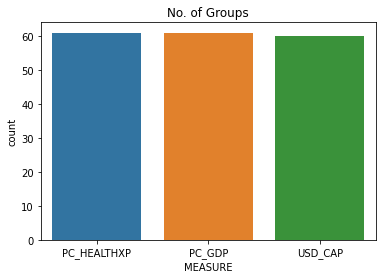

In [22]:
plt.title('No. of Groups')
plot=sns.countplot(x="MEASURE",data=df)

From this visualization,we can observe that our dataset is not balanced as we don't have equal number of count of the groups. We can also observe that we have more number in group B maintaining a huge differnce with the count in group

**SCATTER** **PLOT**

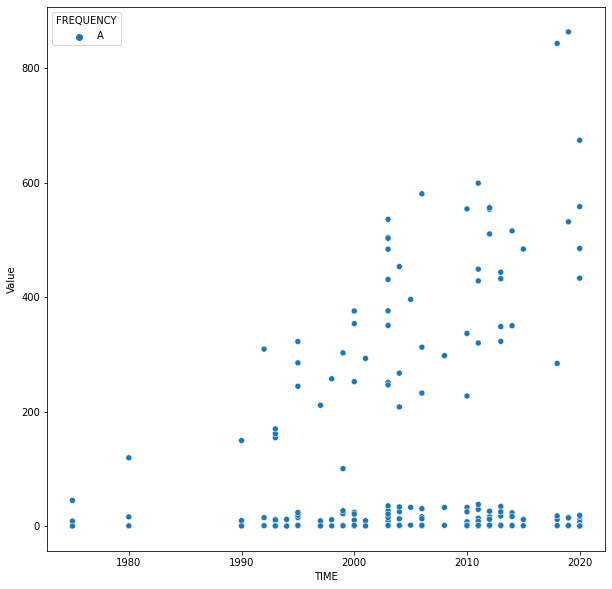

In [23]:
fig, axs = plt.subplots(figsize = (10,10))
plot=sns.scatterplot(x='TIME',y='Value',hue="FREQUENCY",data=df)

Some of the countries spend good amount of time to but medicines but some did not use them properly.

**STRIP** **PLOT**

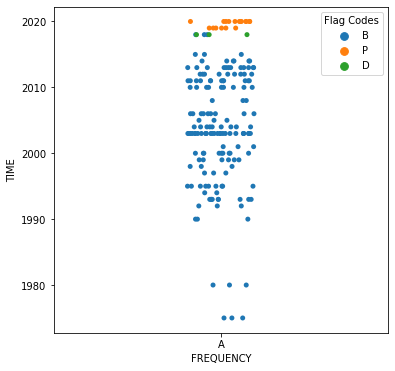

In [25]:
fig, axs = plt.subplots(figsize = (6,6))
plot=sns.stripplot(x="FREQUENCY",y="TIME",hue="Flag Codes",data=df);


From the above visualization,we observed that the inbetween 1980 and 1990 is less and inbetween 2000 and 2020 is more.

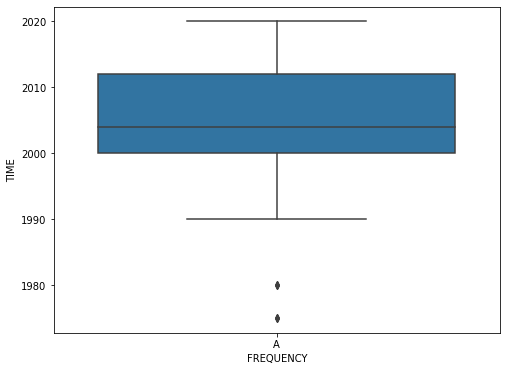

In [26]:
fig, axs = plt.subplots(figsize = (8,6))
plot=sns.boxplot(x="FREQUENCY",y="TIME",data=df)

Here,we can observe that less countries have in 1980 but in increasing time by 2020 countries has increased.

**Correlation** **Between** **Variables**

In [27]:
df.corr()

,TIME,Value
TIME,1.000000,0.204428
Value,0.204428,1.000000


Further, we can visualise this correlation using a heatmap.

**Heat** **Map**

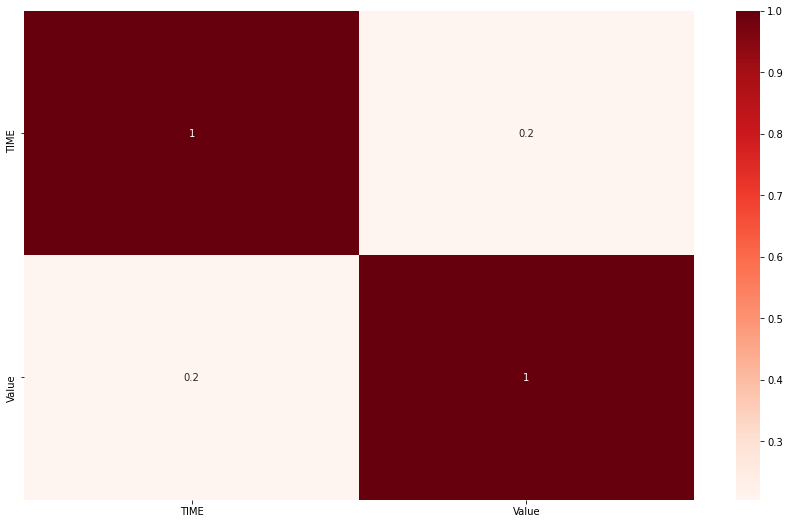

In [28]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Reds', annot = True);

**HIST** **PLOT**

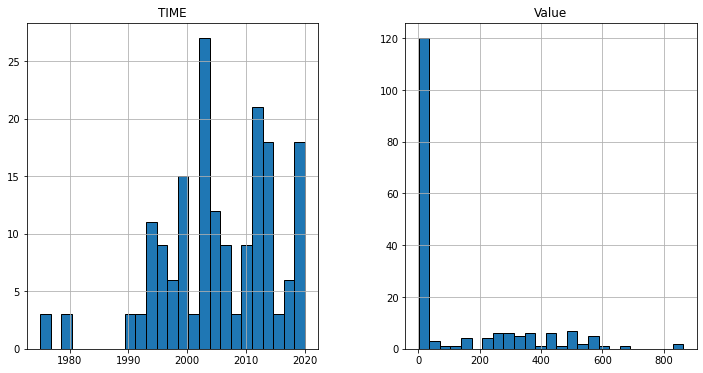

In [29]:
df.hist(edgecolor='black',bins = 25, figsize= (12,6))
plt.show()

Here,we can visualize the distribution of value of our dataset.

**PAIR** **PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


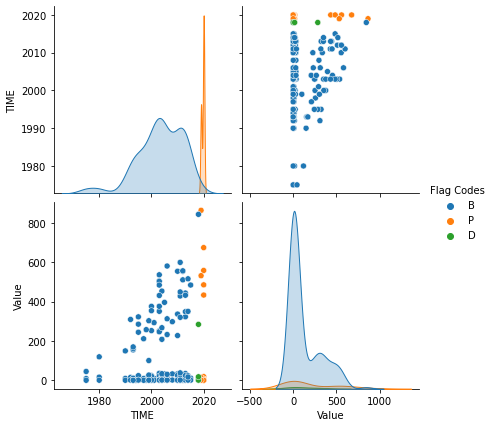

In [30]:
sns.pairplot(data = df,hue="Flag Codes", height=3)

pairplot is showing the bivariate relation between each pair of features. From the pairplot, we'll see that the Gento species is separataed from the other two across all feature combinations

**JOINT** **PLOT**

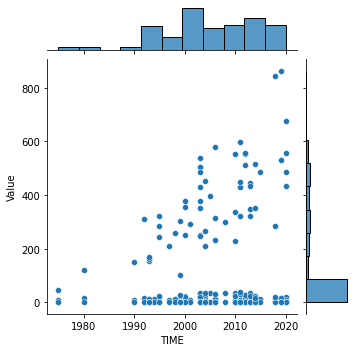

In [31]:
sns.jointplot(x="TIME", y="Value", data=df,height=5)
plt.show()

We can also use the seaborn library to make a similar plot. A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure.

**DIST** **PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


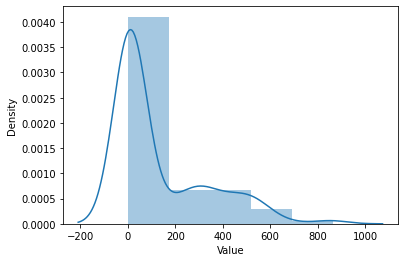

In [32]:
sns.distplot(df['Value'],bins=5)

From the above Dist plot, we can easily observe that value is more between 0 and 200 for the increase in density.

**CONCLUSION**

The dataset is balanced i.e.almost equal records are present for all countries.
we have totally 8 columns in which 2 of the columns are numeric while the other 6 are categorical.

A strong correlation is present between TIME and and Value.